# 선형 회귀분석
```from statsmodels.formula.api import ols```

* 하나 혹은 그 이상의 원인이 종속변수에 미치는 영향을 추적하여 식으로 표현하는 통계기법
* 변수들 사이의 상관관계를 밝히고 모형을 적합하여 관심 있는 변수를 예측하거나 추론하기 위해 사용하는 분석 방법
* *머신러닝은 예측의 성공 확률*을 높이는 데에 목적이 있다면, 전통적 통계분석 방법은 정해진 분포나 가정을 통해 *실패 확률을 줄이고, 원인을 찾는 것*이 목적

    종속, 독립변수가 모두 연속형일 때 주로 회귀분석을 사용한다.

* 전통 회귀분석에서는 평가지표로 R2와 RMSE를 주로 사용
    R2 - 총 변동 중 설명된 변동의 비율
    
    RMSE - 평균 제곱근 오차
* 💡다중 선형 회귀분석의 평가지표💡

    단순 선형 회귀분석과 다르게 독립변수의 개수가 늘어나면 모델의 R2가 증가하게 된다.

    따라서 독립변수의 수에 따라 증가하는 정도에 대한 패널티를 적용시킨 Adjusted R2를 사용한다


## 회귀분석의 검토사항
1. 모형이 데이터를 잘 적합하고 있는가? (모형의 잔차가 특정 패턴을 이루고 있지 않아야함)
2. 회귀 모형이 통계적으로 유의한가? (실제로도 의미가 있고, 우연에 의해 구해진 값이 아니라는 의미) - **F통계량 사용**
3. 모형은 데이터를 얼마나 설명할 수 있는가? - **결정계수 사용**
4. 모형 내의 회귀계수는 유의한가? (독립 변수가 실제로 종속 변수에 영향을 주는지) - **T통계량 사용**


### kc_house_data 예제 - 단순 선형 회귀분석

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.api import OLS

In [2]:
# 데이터 불러오기
house = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/kc_house_data.csv')
house = house[['price', 'sqft_living']]
house.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [3]:
# 상관계수 확인 - 강한 양의 상관관계를 가짐
house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [4]:
# 변수 할당
x = house[['sqft_living']] # DataFrame
y = house['price'] #Series
# 모델 적합
lr = ols('price ~ sqft_living', data=house).fit()
y_pred = lr.predict(x)

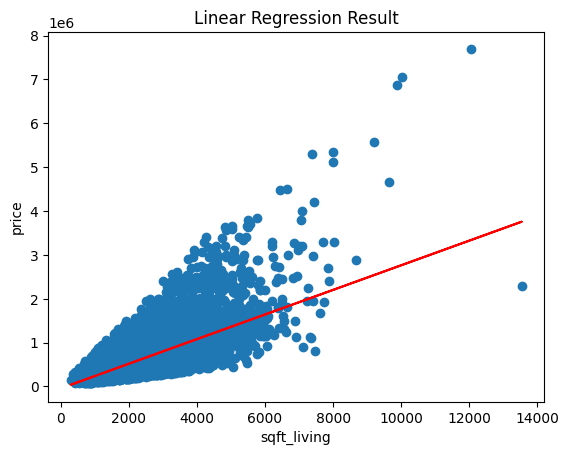

In [5]:

# 시각화
plt.scatter(x,y) ## 원데이터 산포도
plt.plot(x, y_pred, 'r') ## 회귀선
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price', fontsize=10)
plt.title('Linear Regression Result');

In [6]:
# 회귀분석 검토
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:21:17   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* 검토사항 1번: 오차가 (0.0)에서 멀어질수록 분산이 커지는 특정 패턴을 가짐 **불만족**

    단순 회귀 분석으로는 데이터를 충분히 설명할 수 없는 것으로 보임
* 검토사항 2번: F-통계량의 p-value가 0으로 **회귀 모형이 유의하지 않다**는 귀무가설을 기각한다. **만족**
* 검토사항 3번: R2은 0.493, 전체 데이터의 49.3%를 설명한다고 할 수 있다 **불만족**

    모델의 성능이 좋지 않아 보일 수 있지만 도메인에 따라 49.3%의 정확도가 엄청난 수치일 수 있다. 분석가가 잘 판단하고 사용해야 함!
* 검토사항 4번: T-통계량의 p-value가 0.05보다 작으므로 유의한 변수로 볼 수 있다 **만족**


## 다중 회귀분석 유의사항



* 독립변수의 수가 두 개 이상일 경우에는 필수적으로 다중공선성의 문제를 해결해야 함

    다중공선성: 회귀분석에서 독립변수들 간에 강한 상관관게가 나타나는 문제
    1. 독립변수들 간의 상관계수를 구하여 상관성을 직접 파악하고 상관성이 0.9 이상이라면 다중공선성이 있다고 판단한다
    2. 다중공선성이 의심되는 두 독립변수의 회귀분석으로 허용 오차(1-R2)를 구했을 때, 0.1 이하이면 다중공선성 문제가 심각하다고 할 수 있다.
    3. VIF(variance inflation factor)의 값이 10 이상이라면 다중공선성이 존재할 것으로 예상한다.

        VIF > 10의 의미는 i번째 변수를 제외한 회귀식의 R2값이 0.9 이상이라는 의미
        => i번째 변수가 없어도 된다는 의미
        
                         
* 변수선택법[전진선택법, 후진제거법, 단계적 선택법]:

    다중 선형 회귀분석 이외에도 모형 내 설명변수의 수가 증가할수록 모델에 영향을 미치는 데이터를 관리하는 데에는 많은 비용과 노력이 요구된다.
    
    따라서 상황에 따라 유의미한 독립변수만을 선택하여 최적 회귀방정식을 도출하는 과정이 필요하다.

    변수를 선택할 때에는 모델의 유의성 판단의 근거를 삼았던 F-통계량이나 AIC와 같은 기준값을 근거로 변수를 제거 혹은 선택한다.

    * AIC: 최소의 정보 손실을 갖는 모델이 가장 적합한 모델로 선택되는 방법으로 **값이 낮을수록 모형의 적합도가 높다** 는 것을 의미한다.

## cars93 예제 - 다중 회귀분석

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
cars = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/Cars93.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [9]:
# 데이터 전처리
## 컬럼 특수문자 제거
cars.columns = cars.columns.str.replace('.', '')
## 모델 적합
model = ols('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=cars)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           4.88e-14
Time:                        15:21:19   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 다중공선성 해소하기

In [10]:
# 변수 간 상관관계 확인
col = ['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']
cars[col].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


* MPGcity, MPGhighway가 0.9 이상의 상관성을 보임 == 다중공선성

    VIF값 구하기

In [11]:
# VIF값
from patsy import dmatrices # VIF값 연산을 위한 데이터 분할(formula, data=df, return_type = 'dataframe')
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF

```statsmodels.stats.outliers_influence.variance_inflation_factor(exog, exog_idx)```

<img src='./imgs/vif_func.png' width=300px height=450px></img>

In [23]:
y, x = dmatrices('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=cars, return_type='dataframe')
# 독립변수와 종속변수을 df형태로 분리하고 Intercept라는 상수항을 추가함

In [24]:
# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정
vif_list = []
for i in range(1, len(x.columns)): # 각 변수를 제외한 R2값을 비교하는 개념
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]]) # variance_inflation_factor(x값, x인덱스)
pd.DataFrame(vif_list, columns=['vif', 'variance'])
    

,vif,variance
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


* VIF가 가장 높은 변수: MPGcity

In [14]:
# 해당 변수 제거 후 재분석
model = ols('Price ~ EngineSize + RPM + Weight + Length + MPGhighway', data=cars)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.28e-14
Time:                        15:21:19   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize     4.6591      1.386      3.361      0.001       1.904       7.415
RPM            0.0071      0.001      5.173      0.000       0.004       0.010
Weight         0.0053      0.003      1.567      0.121      -0.001       0.012
Length        -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPGhighway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Adj R2와 AIC값에는 큰 차이가 없지만 MPGcity변수를 제거함으로써 MPGhighway의 p-value값이 0.900 -> 0.282로 현저히 낮아진 것을 볼 수 있음

In [19]:
x.head()

,Intercept,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
0,1.0,1.8,6300.0,2705.0,177.0,25.0,31.0
1,1.0,3.2,5500.0,3560.0,195.0,18.0,25.0
2,1.0,2.8,5500.0,3375.0,180.0,20.0,26.0
3,1.0,2.8,5500.0,3405.0,193.0,19.0,26.0
4,1.0,3.5,5700.0,3640.0,186.0,22.0,30.0


In [20]:
y.head()

,Price
0,15.9
1,33.9
2,29.1
3,37.7
4,30.0


### 변수 선택법

In [15]:
import time
import itertools

def processSubset(x, y, feature_set):
    model = ols(y, x[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic #모델의 AIC
    return {"model": regr, "AIC": AIC}

# 전진선택법
def forward(x, y, predictors):
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    remain_predictors = [p for p in x.columns.difference(['Intercept']) if p not in predictors] # df.columns.difference(['제외할 컬럼명'])
    results = []
    for p in remain_predictors:
        results.append(processSubset(x, y, feature_set=predictors+[p]+['Intercept'])) # 모델과 AIC값 dic반환
        models = pd.DataFrame(results) # 결과 비교용 Df
        best_model = models.loc[models["AIC"].argmin()] # Series.argmin(): 최솟값의 인덱스 AIC가 낮을수록 적합도가 높으니까!
        print('Processed', models.shape[0], 'models on', len(predictors)+1, 'predictors in')
        print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[1])
        
        return best_model

# 후진제거법
def backward(x, y, predictors):
    tic = time.time() # 현재시간을 초단위로 반환 (1970.01.01 00:00~)
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1): # itertools.combinations(a,b) a의 원소를 사용해 b개로 이루어진 모든 조합을 만들어줌
        results.appned(processSubset(x, y, feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print('Processed', models.shape[0], 'models on', len(predictors)-1, 'predictors in', (toc-tic)) # 소요시간?
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[1])
    
    return best_model

# 단계적 선택법
def Stepwise_model(x, y):
    Stepmodels = pd.DataFrame(columns=["model", "AIC"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(x, y, predictors)['AIC']
    
    for i in range(1, len(x.columns.diffrence(['Intercept']))+1):
        # 전진
        forward_result = forward(x, y, predictors=predictors) 
        print('[ forward ]')
        Stepmodels.loc[i] = forward_result # bestmodel(['model', 'AIC'])
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = predictors.drop('Intercept', axis=1)
        # 후진
        backward_result = backward(x,y, predictors=predictors) # bestmodel(['model', 'AIC'])
        
        # 전진, 후진 비교
        if backward_result['AIC'] < forward_result['AIC']:
            Stepmodels.loc[i] = backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            predictors = predictors.drop('Intercept', axis=1)
            Smodel_before = Stepmodels.loc[i]['AIC']
            print('[ backward ]')
        
        if backward_result['AIC'] > forward_result['AIC']:
            break
        else:
            
        

In [25]:
x_aic = x.drop('Intercept', axis=1)